In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from cf_matrix import make_confusion_matrix
%matplotlib inline

In [2]:
# HIDDEN_LAYER_SIZES = (12, 4)
HIDDEN_LAYER_SIZES = 12
MAX_ITER = 500
LABELS = ['True Neg','False Pos','False Neg','True Pos']
CATEGORIES = ['Married', 'Divorced']
TEST_SIZE = 0.8
SVM_TITLE = 'SVM 20-80 Confusion Matrix'
RF_TITLE = 'Random Forest 20-80 Confusion Matrix'
NN_TITLE = 'Neural Network 20-80 Confusion Matrix'
# TEST_SIZE = 0.6
# SVM_TITLE = 'SVM 40-60 Confusion Matrix'
# RF_TITLE = 'RF 40-60 Confusion Matrix'
# NN_TITLE = 'NN 40-60 Confusion Matrix'

In [3]:
# divorce = pd.read_csv('divorce-csv.csv')
divorce = pd.read_csv('divorce-ten-features-csv.csv')
# divorce = pd.read_csv('divorce-six-features-csv.csv')
display(divorce.sample(5))
display(divorce.describe())

,Atr12,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr36,Atr38,Atr40,Class
51,3,3,2,3,3,3,3,4,4,4,1
4,1,1,1,1,1,2,1,0,0,1,1
17,4,4,3,4,4,4,4,3,3,3,1
0,0,0,1,0,0,0,1,1,1,3,1
28,4,3,2,3,4,3,4,4,4,4,1


,Atr12,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr36,Atr38,Atr40,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.652941,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.605882,1.858824,1.870588,0.494118
std,1.468654,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.798412,1.734802,1.796039,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.500000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [4]:
divorce.shape

(170, 11)

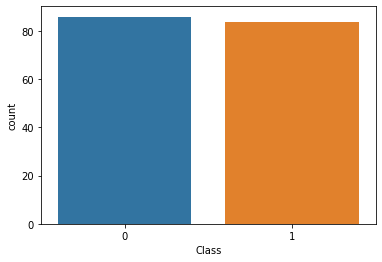

In [5]:
divorce['Class'].value_counts()
sns.countplot(divorce['Class'])

In [6]:
# some checking on our data
# divorce.dtypes
# divorce.Class.describe()
# divorce['Class'].describe()
# divorce.Atr1.value_counts()
# divorce.Atr1.unique()
# divorce.mean(axis=1)
# divorce.Atr2.value_counts().plot(kind='bar')

# Preprocessing

In [7]:
# Check for null values
total = divorce.isnull().sum().sort_values(ascending=False)

In [8]:
X = divorce.drop('Class', axis=1)
y = divorce['Class']

In [9]:
# Split Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 42, shuffle=True)

print((X_train.shape))

(34, 10)


In [10]:
# Normalize data - not necessary when using StandardScaler() as below
# x = divorce.values #returns a numpy array
# print(x)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# divorce = pd.DataFrame(x_scaled)
# divorce

In [11]:
#To normalise the values of the dataset to improve the model accuracy.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier


In [12]:
#to calculate time complexity
start = time.time()

#Create a RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
pred_rfc = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.9705882352941176

In [14]:
end = time.time()
print("Random-Forest execution time: {0:.5} seconds \n".format(end-start))

Random-Forest execution time: 0.36845 seconds 



In [15]:
# classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.94      0.97        70

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



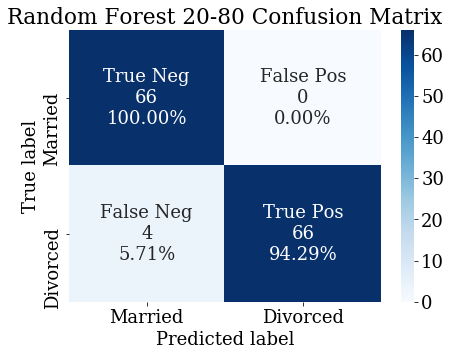

In [16]:
rf_cf_matrix = confusion_matrix(y_test, pred_rfc)
make_confusion_matrix(rf_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = RF_TITLE)

# SVM Classifier

In [17]:
#to calculate time complexity
start = time.time()

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
#Predict the response for test dataset
pred_clf = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# clf.score(X_test,y_test)
# Model Accuracy: how often is the classifier correct?
# print("Accuracy:", metrics.accuracy_score(y_test, pred_clf))
print("Accuracy2:", clf.score(X_test,y_test))

Accuracy2: 0.9705882352941176


In [19]:
end = time.time()
print("SVM execution time: {0:.5} seconds \n".format(end-start))

SVM execution time: 0.37399 seconds 



In [20]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.94      0.97        70

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



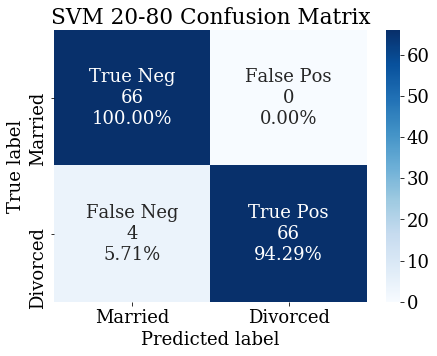

In [21]:
svm_cf_matrix = confusion_matrix(y_test, pred_clf)
make_confusion_matrix(svm_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = SVM_TITLE)

# Neural Network

In [22]:
#to calculate time complexity
start = time.time()

#Create a MLP Classifier
mlpc = MLPClassifier(hidden_layer_sizes=HIDDEN_LAYER_SIZES, activation='logistic', max_iter=MAX_ITER,
                    solver='sgd', learning_rate='adaptive', momentum=1)

#Train the model using the training sets
mlpc.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=12, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500, momentum=1,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
pred_mlpc = mlpc.predict(X_test)
accuracy_score(y_test, pred_mlpc)

0.9705882352941176

In [24]:
end = time.time()
print("MLP execution time: {0:.5} seconds \n".format(end-start))

MLP execution time: 0.38528 seconds 



In [25]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.94      0.97        70

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



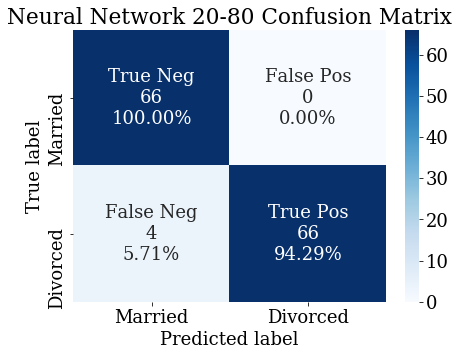

In [26]:
nn_cf_matrix = confusion_matrix(y_test, pred_mlpc)
make_confusion_matrix(nn_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = NN_TITLE)

# Neural Network Details
some checking we did on our network weights to get a better understanding of the results

In [27]:
print("weights between input and first hidden layer:")
print(mlpc.coefs_[0])
print("\nbias between input and first hidden layer:")
print(mlpc.intercepts_[0])

print("\n\nmax weights between input and first hidden layer:")
print(mlpc.coefs_[0].max())
print(mlpc.coefs_[0].min())

weights between input and first hidden layer:
[[ 0.349617   -0.05038372 -0.15702974 -1.01957382 -0.64747928  0.5693365
  -0.2466951   0.79208979  0.56129534 -0.02708213  1.05854621 -0.78166337]
 [-0.15528705 -0.30995156 -0.16524    -0.64339419 -1.07554768  0.78623501
  -0.26115727  0.74451297  0.46166501 -0.09354068  0.96327797 -0.7261163 ]
 [ 0.1220341   0.10888585 -0.28637554 -0.89672633 -1.00967797  0.56336001
   0.08522652  0.5869039   0.47528403  0.08542063  0.89915408 -0.71032793]
 [ 0.08081632  0.05752568 -0.2928828  -0.6302185  -0.7476576   0.91226119
  -0.19979795  0.82716121  0.23535726 -0.07452231  0.89717949 -1.04391965]
 [ 0.36968068  0.04491976 -0.40733411 -0.78338569 -1.03540671  0.62240326
   0.29651387  0.51018834  0.20087237 -0.1130242   0.81092202 -0.95917235]
 [ 0.06678349 -0.19410131 -0.04179734 -0.89107856 -0.99951171  0.87624664
   0.28218744  0.3109932   0.47634247  0.17246873  0.72776969 -0.99740166]
 [ 0.42072622 -0.01224005 -0.15449439 -1.14502336 -1.08825932

In [28]:
print("weights between first hidden and second hidden layer:")
print(mlpc.coefs_[1])
print("\nbias between first hidden and second hidden layer:")
print(mlpc.intercepts_[1])

weights between first hidden and second hidden layer:
[[-0.11671913]
 [-0.90717043]
 [ 0.64409287]
 [-1.40212482]
 [-3.22271742]
 [ 2.32812643]
 [-0.88520377]
 [ 3.14507849]
 [ 1.57732887]
 [ 0.97101713]
 [ 2.15181184]
 [-2.79313985]]

bias between first hidden and second hidden layer:
[-0.09913494]


In [29]:
print("w0 = ", mlpc.coefs_[0][0][0])
print("w1 = ", mlpc.coefs_[0][1][0])

w0 =  0.34961700334861623
w1 =  -0.15528704865759077


In [30]:
#The weight vector of H00 can be accessed with
mlpc.coefs_[0][:,0]

array([ 0.349617  , -0.15528705,  0.1220341 ,  0.08081632,  0.36968068,
        0.06678349,  0.42072622, -0.10475412, -0.13551977, -0.01092298])